## Analiza podatkov


V tej raziskavi analiziramo različne podatke o vseh zabeleženih šahovskih partijah, ki so bile odigrane v zadnjih petih letih. Beležene so bile partije med šahisti vseh nivojev, s tem, da je poudarek predvsem na partijah šahovskih mojstrov. Podatke smo vzeli s spletne strani www.chessgames.com, kjer smo dobili sledeče podatke: imeni belega in črnega šahista, izid partije, število potez, leto in otvoritev odigrane partije. Glede na pridobljene podatke lahko obravnavamo sledeče hipoteze:
- Najpogostejša otvoritev bo 1. e4,
- Najpogostejša otvoritev bo v vsakem izmed zadnjih petih let enaka,
- Med beleženimi izidi partij bo največ remijev, manj zmag belega in še manj zmag črnega,
- Povprečno število potez v zadnjih petih let se ne bo spremenilo,
- Odvisnost med otvoritvijo in številom potez je sledeča: Bolj kot je otvoritev "zaprta", večje bo povprečno število potez.

Pri zadnji hipotezi s terminom "zaprta" otvoritev opisujemo takšno otvoritev, kjer se pomenja malo šahovskih figur, ponavadi je na šahovnici še veliko kmetov... 

Uvozimo najprej datoteko partije.csv.

In [ ]:
import pandas as pd
partije = pd.read_csv("../../PROG1/IndieAnalysis/partije.csv")

In [ ]:
partije

,Beli,Črni,Izid,Število potez,Leto,Otvoritev
0,T Kett,M A Ismail,Črni zmaga,36,2023,Caro-Kann Defense
1,A A Gorgun,K Hryshchenko,Črni zmaga,23,2023,Robatsch
2,G Miller,M Payne,Črni zmaga,27,2023,English
3,Julia Ostensson,B Amin,Črni zmaga,18,2023,Four Knights
4,T Keinanen,Ludvig Morell,Črni zmaga,19,2023,Uncommon King's Pawn Opening
...,...,...,...,...,...,...
131691,S Terentiev,A Balaji,Remi,48,2019,English
131692,R Edouard,M Bagi,Remi,66,2019,"English, Symmetrical"
131693,Sengupta,R Bates,Remi,62,2019,King's Indian
131694,O Willson,A Fishbein,Remi,51,2019,King's Indian


### Najpogostejša otvoritev

Želimo ugotoviti, katera otvoritev je bila v zadnjih petih letih najpogostejša. Zato partije grupiramo po otvoritvi in število partij v otvoritvah prikažemo padajoče.

In [ ]:
popularne_otvoritve = partije.groupby('Otvoritev').size().sort_values(ascending=False).head(15)
popularne_otvoritve

Otvoritev
Queen's Pawn Game                              10999
English                                         7911
Sicilian                                        7122
Queen's Gambit Declined                         5773
Reti Opening                                    5081
Ruy Lopez                                       4078
Giuoco Piano                                    3527
King's Indian Attack                            3155
Sicilian, Najdorf                               3144
Queen's Gambit Declined Slav                    3046
King's Indian                                   2854
Caro-Kann Defense                               2352
Sicilian, Canal-Sokolsky (Rossolimo) Attack     2000
Queen's Gambit Declined Semi-Slav               1988
Queen's Indian                                  1930
dtype: int64

Vidimo, da so daleč najbolj pogoste otvoritev daminega kmeta (oziroma 1. d4), angleška (oziroma 1. c4) in na tretjem mestu sicilijanska, ki je v resnici otvoritev, za katero se odloči črni (oziroma 1. e4 c4). 
V skladu s hipotezo je, da je otvoritev 1. d4 na prvem mestu, kar pa je zanimivo je, da je otvoritev 1. c4 navidezno pred otvoritvijo 1. e4. Vendar to ne drži. Z nekaj šahovskega znanja vemo, da je sicilijanska zgolj ena izmed mnogih podvariant otvoritve 1. e4, obstajajo še druge, ki so na seznamu, npr. Ruy Lopez, Giuoco Piano, Najdorf... Če bi torej združili vse podvariante, ki se začnejo s potezo e4, in jim dali skupno ime, bi bila le-ta zagotovo na prvem mestu. Hipoteza torej drži.


In [ ]:

print('#============================#')
for leto in range(2019, 2024):
    partije_za_to_leto = partije[partije['Leto'] == leto]
    print(f' {leto}:     ', partije_za_to_leto['Otvoritev'].mode().iloc[0])
print('#============================#')

# partije_za_2023 = partije[partije['Leto'] == 2023]
# temp = partije_za_2023['Otvoritev'].groupby('Otvoritev').size()

#============================#
 2019:      Queen's Pawn Game
 2020:      Queen's Pawn Game
 2021:      Queen's Pawn Game
 2022:      Queen's Pawn Game
 2023:      Queen's Pawn Game
#============================#


Zanima nas še, ali se najpogostejša otvoritev skozi leta spreminja ali ostaja enaka. S seznama je jasno razvidno, da je 1. d4 na prvem mestu vsa leta. Ker smo za vzorec podatkov vzeli zgolj zadnjih pet let, to zagotovo ni presenetljivo. Če bi želeli temeljito preučevati, kako se je popularnost posameznih otvoritev spreminjala skozi čas, bi za vzorec potrebovali vzeti vse partije izpred nekaj stoletij. Zanimivo bi bilo tudi primerjati popularnosti otvoritev 1. e4 in 1. d4 skozi zgodovino. 

### Izidi partij

Grupirajmo sedaj partije po številu posameznih izidov in rezultat prikažimo grafično.

In [ ]:
partije.groupby('Izid').size()

Izid
Beli zmaga    49490
Remi          44158
Črni zmaga    38048
dtype: int64

<AxesSubplot: xlabel='Izid'>

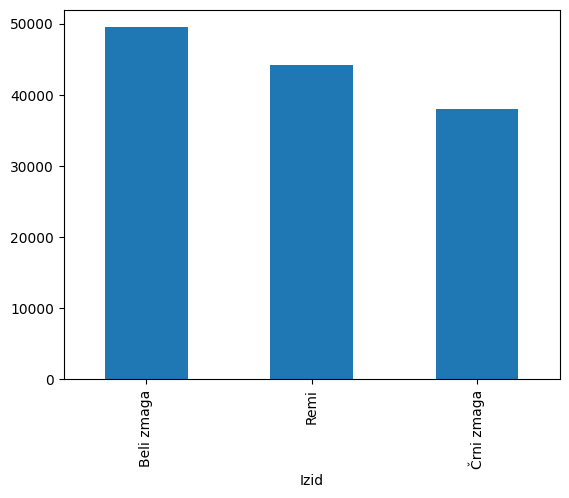

In [ ]:
partije.groupby('Izid').size().plot.bar(x='Izid')

Z grafa preberemo, da je največ partij se končalo z zmago belega, nekaj manj je bilo remijev in najmanj zmag črnega. To se ne sklada s hipotezo, neskladje bi osebno razložil tako: Če bi analizirali podatke zgolj partij med velemojstri (najvišji naziv v šahovskem svetu), bi bilo zagotovo največ remijev, saj preprosto delajo manj napak. V šahu ima v začetku rahlo prednost beli, ker ima na voljo začetno potezo. Ta začetna poteza igra v velemojstrskih partijah manjšo vlogo kot v partijah nižjekategornikov. Ker smo vzeli podatke o partijah, ki so jih igrali šahisti vseh kategorij, je bilo več zmag belega kot remijev. 

### Povprečno število potez

In [32]:
partije[['Leto', 'Število potez']].groupby('Leto').mean()

,Število potez
Leto,
2019,44.547129
2020,44.539158
2021,45.272696
2022,45.601823
2023,44.794849


Če partije sedaj grupiramo po povprečnem številu potez, vidimo, da povprečje niha med 45 in 46 (zaokroženo na celo število). Podobno kot pri otvoritvah, je vzorec zadnjih petih let premalo, da bi opazili večja nihanja med povprečnim številom potez skozi leta. 

### Razmerje med številom potez in otvoritvijo

In [ ]:
temp = partije[['Število potez', 'Otvoritev']]
temp.groupby('Otvoritev').mean().sort_values('Število potez', ascending=False)

,Število potez
Otvoritev,
"Sicilian, Closed, 6.Be3",67.000000
"Nimzo-Indian, Spielmann Variation",61.000000
"King's Indian, Four Pawns Attack, Main line",59.000000
"Sicilian, Accelerated Fianchetto, Maroczy Bind, 6.Be3",56.285714
"Ruy Lopez, Closed, Chigorin",53.794118
...,...
"Dutch, Ilyin-Genevsky Variation with b3",32.500000
"Nimzo-Indian, Classical, Noa Variation, 5.cd ed",31.833333
"Benoni, Classical, 9...Re8",31.000000


Sedaj sortiramo vse otvoritve po padajočem povprečnem številu potez. Daleč najvišje povprečje ima zaprta varianta sicilijanske otvoritve. Nato ji sledijo nimzo-indijska, kraljevo-indijska in pospešena sicilijanska, ki praviloma veljajo za bolj odprte otvoritve. Chigorinova varianta Ruy Lopeza je zaprta.
Zanimivo je, da kar štiri izmed petih otvoritev z najnižjim povprečnim številom potez veljajo načeloma za zaprte, razen posebna varianta nimzo-indijske, ki je praviloma odprta.
Sklepamo lahko torej, da naša hipoteza ne drži. Osebno sem bil mnenja, da bodo partije, ki izhajajo iz odprtih otvoritev, krajše, saj se hitreje pomenjajo figure, vendar temu ni tako. 